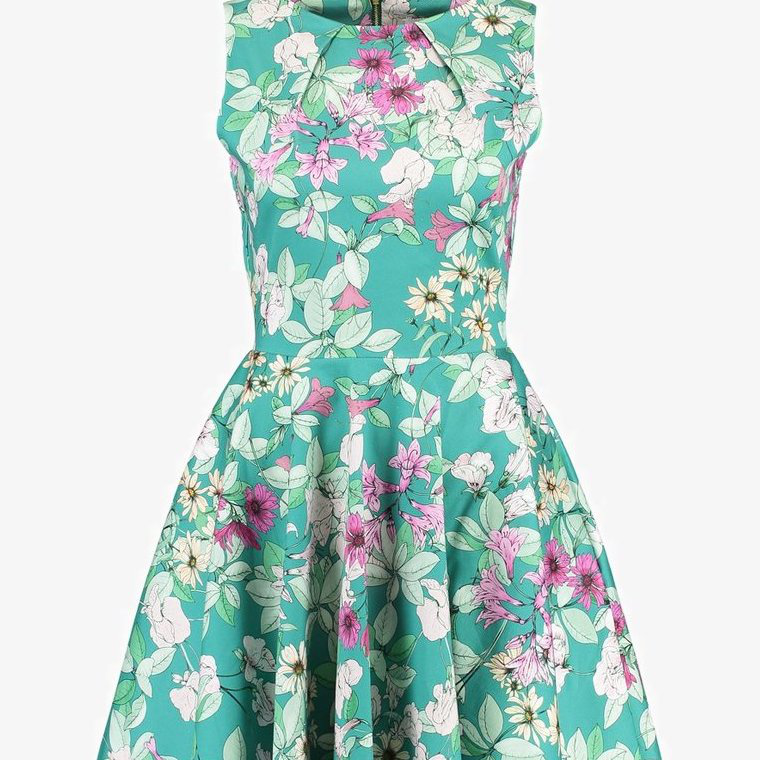

In [69]:
from PIL import Image
im = Image.open("../test_data/IMG-4.JPG")
from IPython.display import display 
display(im)

In [70]:
im_28 = im.resize((28, 28))

In [71]:
display(im_28)

In [72]:
im_28_gr = im_28.convert('L')
display(im_28_gr)

In [73]:
import numpy as np
im_28_gr_arr = np.asarray(im_28_gr).astype('float32')

In [74]:
im_28_gr_arr.shape

(28, 28)

In [75]:
im_28_gr_arr /= 255

In [76]:
x_test = np.array([im_28_gr_arr.reshape(28, 28, 1)])
x_test.shape

(1, 28, 28, 1)

In [77]:
from keras.models import load_model

In [9]:
model = load_model('my_model.h5')

In [78]:
result = model.predict(x_test)
result.shape

(1, 10)

In [79]:
np.sort(result[0])

array([0.00214954, 0.00670289, 0.01211775, 0.04285084, 0.07669162,
       0.08204151, 0.09363803, 0.12613559, 0.25725493, 0.3004174 ],
      dtype=float32)

In [80]:
index = sorted(range(len(result[0])), key=lambda i: result[0][i], reverse=True)[:3]
index

[0, 6, 2]

In [82]:
result[0][index]

array([0.3004174 , 0.25725493, 0.12613559], dtype=float32)

In [40]:
result.argmax(axis=-1)

array([8])